It includes individual codes and files, and it has all the code from the project.

Training Data Loading and Cleaning

In [2]:
import re
import pandas as pd
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer

#Dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

#Dictionary containing common abbreviations and their meanings.
abbreviations = {
    "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", 
    "a3": "anytime anywhere anyplace", "afaik": "as far as I know", "app": "application", 
    "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", "btw": "by the way",
    "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", "g9": "genius", 
    "idk": "I do not know", "imho": "in my humble opinion", "imo": "in my opinion", "irl": "in real life",
    "jk": "just kidding", "lol": "laughing out loud", "omg": "oh my god", "omw": "on my way", 
    "ppl": "people", "rofl": "rolling on the floor laughing", "smh": "shake my head", 
    "tbh": "to be honest", "thx": "thank you", "ttyl": "talk to you later", "u": "you", 
    "w/": "with", "w/o": "without", "wtf": "what the fuck", "wtg": "way to go", "wyd": "what you doing"
}

#Downloading required NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

class data_cleaning:
    def __init__(self, file_path):
        #Initialize with the path to the CSV file
        self.file_path = file_path
        self.df_data = None
        self.stop_word = set(stopwords.words('english'))
        #For stemming
        self.stemmer = PorterStemmer()  
        #For lemmatization
        self.lemmatizer = WordNetLemmatizer()
        #For tokenizing  
        self.tokenizer = WordPunctTokenizer()  
    
    def load_data(self):
        #Loading data from CSV file
        self.df_data = pd.read_csv(self.file_path, encoding='latin-1', 
                                   names=['target', 'id', 'date', 'flag', 'user', 'text'])
        print("Data loaded successfully.")
        
    def expand_contractions(self, text):
        #Expanding contractions in the text using the 'contractions' library
        return contractions.fix(text)
    
    def replace_emojis(self, text):
        #Replacing emojis with their meanings
        for emoji, meaning in emojis.items():
            text = text.replace(emoji, meaning)
        return text
    
    def replace_abbreviations(self, text):
        #Replacing abbreviations with their meanings
        for abbr, full_form in abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    def clean_text(self, text):
        #Normalizing text (convert to lowercase)
        text = text.lower()
        
        #Expanding contractions
        text = self.expand_contractions(text)
        
        #Replacing emojis with meanings
        text = self.replace_emojis(text)
        
        #Replacing abbreviations with full forms
        text = self.replace_abbreviations(text)
        
        #Removing URLs
        text = re.sub(r'http\S+', '', text)
        
        #Removing mentions
        text = re.sub(r'@\w+', '', text)
        
        #Removing special characters and punctuation
        text = re.sub(r'[^a-z\s]', '', text)
        
        #Tokenization
        tokens = word_tokenize(text)
        
        #Removing stopwords (commonly used words that don't carry much meaning)
        tokens = [word for word in tokens if word not in self.stop_word]
        
        #Lemmatization (convert words to base form)
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        
        #Stemming (reducing words to their root form)
        tokens = [self.stemmer.stem(word) for word in tokens]  
        
        #Joining the tokens back into a single string
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text
    
    def clean_data(self):
        #Applying text cleaning to the dataset
        if self.df_data is not None:
            self.df_data['cleaned_text'] = self.df_data['text'].apply(self.clean_text)
            print("Text data cleaned.")
        else:
            print("Data not loaded yet. Please load the data first.")
    
    def replace_target_values(self):
        #Replacing target values: 4 -> 1 for positive sentiment
        if self.df_data is not None:
            self.df_data['target'] = self.df_data['target'].replace(4, 1)
            print("Target values replaced: 4 -> 1 for positive sentiment.")
        else:
            print("Data not loaded yet. Please load the data first.")
    
    def save_cleaned_data(self, output_file):
        #Saving the cleaned data to a new CSV file
        if self.df_data is not None:
            self.df_data.to_csv(output_file, index=False)
            print(f"Cleaned data saved to {output_file}.")
        else:
            print("No data to save. Please clean the data first.")
    
    def sentiment_distribution(self):
        #Checking sentiment distribution
        if self.df_data is not None:
            print(f"Total Tweets: {len(self.df_data)}")
            print(self.df_data['target'].value_counts())
        else:
            print("Data not loaded yet. Please load the data first.")

#Main execution block
if __name__ == "__main__":
    file_path = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/training_data/train.csv'
    output_file = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/training_data/cleaned_data2.csv'
    
    #Calling data_cleaning class
    data = data_cleaning(file_path)
    
    #Loading the dataset
    data.load_data()
    
    #Cleaning the text data
    data.clean_data()
    
    #Replacing target values (4 -> 1)
    data.replace_target_values()
    
    #Checking sentiment distribution
    data.sentiment_distribution()
    
    #Saving the cleaned data to a new file
    data.save_cleaned_data(output_file)


Data loaded successfully.
Text data cleaned.
Target values replaced: 4 -> 1 for positive sentiment.
Total Tweets: 1600000
target
0    800000
1    800000
Name: count, dtype: int64
Cleaned data saved to D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/training_data/cleaned_data2.csv.


Model Stacking with Random Forest and Logistic Regression, Logistic Regression as Meta-model

Model building, fine tuning and saving

Cleaned data loaded successfully.
Accuracy Score: 0.78555625
Precision Score: 0.7922333184911902
Recall Score: 0.7759647614419398
F1 Score: 0.7840146545971874

Confusion Matrix:
 [[126831  32663]
 [ 35959 124547]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79    159494
           1       0.79      0.78      0.78    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

AUC Score: 0.8664520775946929


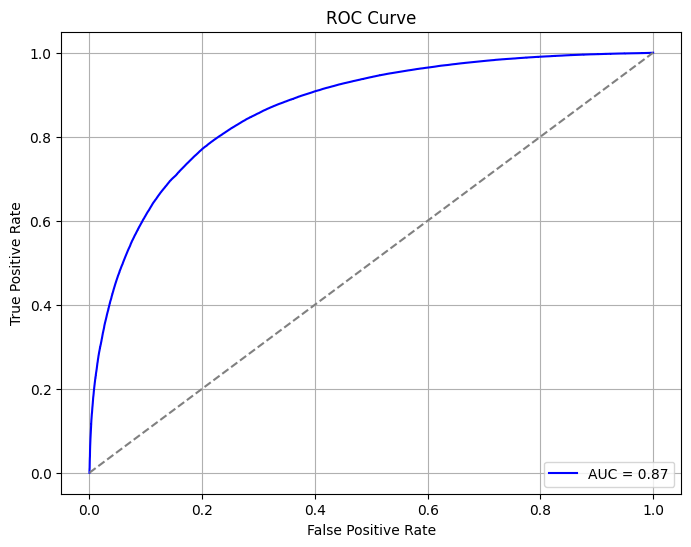

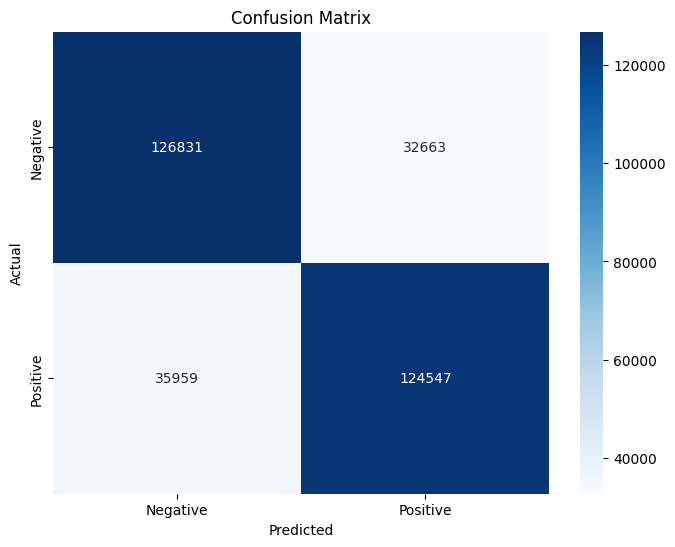

Model and vectorizer saved successfully.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

#Class to create the model
class SentimentModel:
    def __init__(self, cleaned_file_path):
        self.cleaned_file_path = cleaned_file_path
        self.df_data = None
        self.model = None 
        
    def load_cleaned_data(self):
        #Loading the cleaned data
        self.df_data = pd.read_csv(self.cleaned_file_path)
        print("Cleaned data loaded successfully.")
    
    def train_sentiment_model(self):
        #Replaceing NaN values in 'cleaned_text' with an empty string
        self.df_data['cleaned_text'] = self.df_data['cleaned_text'].fillna('')
        
        if self.df_data is not None:
            #Splitting data into training and testing sets before vectorization
            X = self.df_data['cleaned_text']
            y = self.df_data['target']
            
            #Spliting into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            #Vectorization of the text data using TfidfVectorizer (only fitting on training data)
            vectorizer = TfidfVectorizer(ngram_range=(1, 3))
            X_train_vect = vectorizer.fit_transform(X_train)
            #Transforming the test data using the fitted vectorizer
            X_test_vect = vectorizer.transform(X_test)  
            
            #Base models if Logistic and Random Forest
            base_learners = [
                ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)),
                ('lr', LogisticRegression(C=2, max_iter=1000, n_jobs=-1))
                
            ]
            
            #Stacking Classifier (Logistic Regression as meta-model)
            self.model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
            
            #Fitting the stacking model on the half training data
            self.model.fit(X_train_vect, y_train)
            
            #Predicting on the test set
            y_pred = self.model.predict(X_test_vect)
            #Getting probabilities for the positive class
            y_pred_proba = self.model.predict_proba(X_test_vect)[:, 1]  
            
            #Model performance evaluation
            print('Accuracy Score:', accuracy_score(y_test, y_pred))
            print('Precision Score:', precision_score(y_test, y_pred))
            print('Recall Score:', recall_score(y_test, y_pred))
            print('F1 Score:', f1_score(y_test, y_pred))
            print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
            print('\nClassification Report:\n', classification_report(y_test, y_pred))
            
            #Adding AUC score
            auc_score = roc_auc_score(y_test, y_pred_proba)
            print('AUC Score:', auc_score)
            
            #Plotting the ROC curve
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.grid(True)
            plt.show()
            
            #Plotting Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

            #Saveing the trained model and vectorizer
            joblib.dump(self.model, 'stacked_sentiment_model_v2.pkl')
            joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
            print("Model and vectorizer saved successfully.")

        else:
            print("Cleaned data not loaded yet. Please load the data first.")
            
#Main execution block
if __name__ == "__main__":
    cleaned_file_path = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/training_data/cleaned_data.csv'
    
    #Calling SentimentModel class
    sentiment_model = SentimentModel(cleaned_file_path)
    
    #Loading cleaned data
    sentiment_model.load_cleaned_data()
    
    #Training the sentiment analysis model with stacking
    sentiment_model.train_sentiment_model()


Model Testing

In [3]:
import joblib
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import contractions

#Dictionaries for emojis and abbreviations
emojis = {
    ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', 
    ':P': 'raspberry', ':O': 'surprised', ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', ':\\': 'annoyed', 
    ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy', '@@': 'eyeroll', 
    ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused', '<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
    ":'-)": 'sadsmile', ';)': 'wink', ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel', '(:-D': 'gossip', '=^.^=': 'cat'
}

abbreviations = {
    "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", "afaik": "as far as I know", 
    "app": "application", "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", 
    "btw": "by the way", "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", 
    "idk": "I do not know", "imho": "in my humble opinion", "lol": "laughing out loud", "omg": "oh my god", 
    "omw": "on my way", "ppl": "people", "smh": "shake my head", "tbh": "to be honest", "ttyl": "talk to you later", 
    "u": "you", "w/": "with", "w/o": "without", "wtf": "what the f***", "wyd": "what you doing"
}

#Data cleaning class to clean the input data
class data_cleaning:
    def __init__(self):
        self.stop_word = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()  #For stemming
        self.lemmatizer = WordNetLemmatizer()  #For lemmatization
    
    def expand_contractions(self, text):
        #Expand contractions with contraction library
        return contractions.fix(text)
    
    def replace_emojis(self, text):
        #Replace emojis with their meanings in text for better understanding
        for emoji, meaning in emojis.items():
            text = text.replace(emoji, meaning)
        return text
    
    def replace_abbreviations(self, text):
        #Replace abbreviations with their full forms
        for abbr, full_form in abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    def clean_text(self, text):
        #Normalizing text (convert to lowercase)
        text = text.lower()
        #Expanding contractions
        text = self.expand_contractions(text)
        #Replacing emojis with meanings
        text = self.replace_emojis(text)
        #Replacing abbreviations with full forms
        text = self.replace_abbreviations(text)
        #Removing URLs
        text = re.sub(r'http\S+', '', text)
        #Removing mentions (e.g., @username)
        text = re.sub(r'@\w+', '', text)
        #Removing special characters and punctuation (leaving letters and spaces)
        text = re.sub(r'[^a-z\s]', '', text)
        #Tokenizing the text
        tokens = word_tokenize(text)
        #Removing stopwords
        tokens = [word for word in tokens if word not in self.stop_word]
        #Lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        #Stemming
        tokens = [self.stemmer.stem(word) for word in tokens]
        #Join tokens back into a cleaned string
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text

#Sentiment predictor class
class SentimentPredictor:
    def __init__(self, model_path, vectorizer_path):
        #Loading the pre-trained model and vectorizer
        self.model = joblib.load(model_path)
        self.vectorizer = joblib.load(vectorizer_path)
        #Initializing the data cleaning object
        self.cleaner = data_cleaning()  
    
    def predict_sentiment(self, new_texts):
        #Checking if input is a single string, if so, convert to a list
        if isinstance(new_texts, str):
            new_texts = [new_texts]
        
        #Cleaning each text before predicting sentiment
        cleaned_texts = [self.cleaner.clean_text(text) for text in new_texts]
        
        #Transforming the cleaned text data using the loaded TfidfVectorizer
        X_new = self.vectorizer.transform(cleaned_texts)
        
        #Predicting the sentiment using the loaded model
        predictions = self.model.predict(X_new)
        #Geting probability for the positive class
        prediction_proba = self.model.predict_proba(X_new)[:, 1]  
        
        #Returning the predictions and probabilities
        return predictions, prediction_proba

#Usage
if __name__ == "__main__":
    #Path to the saved model and vectorizer
    model_path = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/Development/stacked_sentiment_model.pkl'
    vectorizer_path = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/Development/tfidf_vectorizer.pkl'
    
    #Initializing the predictor
    sentiment_predictor = SentimentPredictor(model_path, vectorizer_path)
    
    #Giving text to get the sentiment
    new_texts = [
        "This is an amazing product, I love it!",
        "I hate it here",
        "I love you :)",
        "I hate you",
        "It's amazing",
        "I wanna kill you",
        "I had a decent time, nothing special."
    ]
    
    #Predicting the sentiment
    predictions, probabilities = sentiment_predictor.predict_sentiment(new_texts)
    
    #Displaying the results
    for text, prediction, probability in zip(new_texts, predictions, probabilities):
        sentiment = "Positive" if prediction == 1 else "Negative"
        print(f"Text: {text}\nPredicted Sentiment: {sentiment}, Probability: {probability:.2f}\n")


Text: This is an amazing product, I love it!
Predicted Sentiment: Positive, Probability: 0.95

Text: I hate it here
Predicted Sentiment: Negative, Probability: 0.05

Text: I love you :)
Predicted Sentiment: Positive, Probability: 0.95

Text: I hate you
Predicted Sentiment: Negative, Probability: 0.05

Text: It's amazing
Predicted Sentiment: Positive, Probability: 0.95

Text: I wanna kill you
Predicted Sentiment: Negative, Probability: 0.05

Text: I had a decent time, nothing special.
Predicted Sentiment: Positive, Probability: 0.77



Model Interpretability with LIME

[('love', 0.07248216849239265), ('appreci', 0.06057533348359115), ('lack', -0.05790575590848752), ('stood', -0.05439266185688717), ('without', -0.054133694354965935), ('though', -0.046346654017480206), ('product', 0.045209534355676984), ('exceed', -0.04516563050165513), ('feel', -0.04278359799151036), ('noth', -0.0405905968909742), ('end', -0.0375450815053676), ('interact', 0.036862038406310714), ('overal', 0.03650422973367099), ('except', -0.03529634397054425), ('either', -0.032739052643174074), ('felt', -0.029718831123843024), ('transact', -0.029196525415941095), ('howev', -0.028103632925388315), ('servic', -0.025336573164763183), ('much', -0.022763246424995883)]


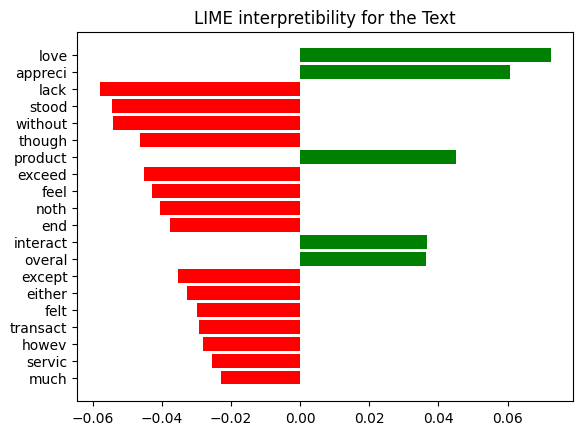

In [4]:
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from lime.lime_text import LimeTextExplainer
import numpy as np
import joblib
import matplotlib.pyplot as plt

#Class for text preprocessing
class TextCleaner:
    def __init__(self):
        #Initialize stopwords, lemmatizer, and stemmer
        self.stop_word = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()

        #Dictionary containing all emojis with their meanings.
        self.emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
                       ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
                       ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', ':\\': 'annoyed', 
                       ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
                       '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
                       '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
                       ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

        #Dictionary containing common abbreviations and their meanings.
        self.abbreviations = {
            "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", 
            "a3": "anytime anywhere anyplace", "afaik": "as far as I know", "app": "application", 
            "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", "btw": "by the way",
            "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", "g9": "genius", 
            "idk": "I do not know", "imho": "in my humble opinion", "imo": "in my opinion", "irl": "in real life",
            "jk": "just kidding", "lol": "laughing out loud", "omg": "oh my god", "omw": "on my way", 
            "ppl": "people", "rofl": "rolling on the floor laughing", "smh": "shake my head", 
            "tbh": "to be honest", "thx": "thank you", "ttyl": "talk to you later", "u": "you", 
            "w/": "with", "w/o": "without", "wtf": "what the fuck", "wtg": "way to go", "wyd": "what you doing"
        }

    #Function to extend contractions
    def expand_contractions(self, text):
        return contractions.fix(text)
    
    #Replacing emojis with their meanings
    def replace_emojis(self, text):
        for emojis, meaning in self.emojis.items():
            text = text.replace(emojis, meaning)
        return text
    
    #Replacing abbreviations with their meanings
    def replace_abbreviations(self, text):
        for abbr, full_form in self.abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    #function to clean the text
    def clean_text(self, text):
        #Normalizing text (convert to lowercase)
        text = text.lower()
        #Expanding contractions
        text = self.expand_contractions(text)
        #Replacing emojis with meanings
        text = self.replace_emojis(text)
        #Replacing abbreviations with full forms
        text = self.replace_abbreviations(text)
        #Removing URLs
        text = re.sub(r'http\S+', '', text)
        #Removing mentions (e.g., @user)
        text = re.sub(r'@\w+', '', text)
        #Removing special characters and punctuation
        text = re.sub(r'[^a-z\s]', '', text)
        #Tokenization
        tokens = word_tokenize(text)
        #Removing stopwords (commonly used words that don't carry much meaning)
        tokens = [word for word in tokens if word not in self.stop_word]
        #Lemmatization (convert words to base form)
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        #Stemming (reducing words to their root form)
        tokens = [self.stemmer.stem(word) for word in tokens]  
        #Joining the tokens back into a single string
        cleaned_text = ' '.join(tokens)
        
        return cleaned_text

#Loading the saved model
classifier = joblib.load('stacked_sentiment_model.pkl')

#Loading the saved vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

#Example text data for model interpretibility
data = [
    'The service was satisfactory, and the product generally met expectations love, though it didn’t exceed them. There were no significant problems, but nothing exceptional stood out either. The delivery was timely, and the item arrived in good condition, which was appreciated. However, the overall experience felt average, lacking any standout features. Communication from customer service was prompt, but there was nothing that made the interaction feel particularly memorable or personalized. In the end, it was a standard purchase with nothing particularly remarkable, but it also wasn’t. Just an ordinary transaction without much to note.'
    ]

#Cleaning the text data using TextCleaner
text_cleaner = TextCleaner()
cleaned_data = [text_cleaner.clean_text(text) for text in data]

#Vectorizing the cleaned text using the loaded vectorizer
X = vectorizer.transform(cleaned_data)

#Target labels for classification (e.g., 0 = Negative, 1 = Positive)
y = np.array([0, 1])

#Creating a LIME Text Explainer
explainer = LimeTextExplainer(class_names=['Negative', 'Positive'])

#Defining the prediction function for LIME
def predict_fn(texts):
    #Transforming the input texts into the same format as training data
    text_transformed = vectorizer.transform(texts)
    return classifier.predict_proba(text_transformed)

#Explaining the prediction for a single instance (the first text)
explanation = explainer.explain_instance(cleaned_data[0], predict_fn, num_features=20)

#Showing the explanation in text format
print(explanation.as_list())

#Showing the explanation in a plot format
fig = explanation.as_pyplot_figure()
plt.title('LIME interpretibility for the Text')
plt.show()

Model Deployment with Flask for API with endpoint

In [5]:
#Importing the libraries
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import contractions
import os

#Initializing Flask app
app = Flask(__name__)

#Path to model and vectorizer files
model_path = 'stacked_sentiment_model.pkl'
vectorizer_path = 'tfidf_vectorizer.pkl'

#Load model and vectorizer
model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

#Downloading required NLTK resources
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

#Dictionaries for emojis and abbreviations
emojis = {
    ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', 
    ':P': 'raspberry', ':O': 'surprised', ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', ':\\': 'annoyed', 
    ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy', '@@': 'eyeroll', 
    ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused', '<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
    ":'-)": 'sadsmile', ';)': 'wink', ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel', '(:-D': 'gossip', '=^.^=': 'cat'
}

abbreviations = {
    "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", "afaik": "as far as I know", 
    "app": "application", "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", 
    "btw": "by the way", "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", 
    "idk": "I do not know", "imho": "in my humble opinion", "lol": "laughing out loud", "omg": "oh my god", 
    "omw": "on my way", "ppl": "people", "smh": "shake my head", "tbh": "to be honest", "ttyl": "talk to you later", 
    "u": "you", "w/": "with", "w/o": "without", "wtf": "what the f***", "wyd": "what you doing"
}

#Data cleaning class to clean the input data
class DataCleaning:
    def __init__(self):
        self.stop_word = set(stopwords.words('english'))
        #Stemming
        self.stemmer = PorterStemmer()  
        #Lemmatization
        self.lemmatizer = WordNetLemmatizer()  
    
    #Function for expanding
    def expand_contractions(self, text):
        return contractions.fix(text)
    
    #Function to replace emojis with their meanings
    def replace_emojis(self, text):
        for emoji, meaning in emojis.items():
            text = text.replace(emoji, meaning)
        return text
    
    #function to replace abbreviations with their meanings
    def replace_abbreviations(self, text):
        for abbr, full_form in abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    #Data cleaing
    def clean_text(self, text):
        text = text.lower()
        text = self.expand_contractions(text)
        text = self.replace_emojis(text)
        text = self.replace_abbreviations(text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in self.stop_word]
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        tokens = [self.stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)

#Sentiment prediction function
def predict_sentiment(texts):
    cleaner = DataCleaning()
    cleaned_texts = [cleaner.clean_text(text) for text in texts]
    X_new = vectorizer.transform(cleaned_texts)
    predictions_proba = model.predict_proba(X_new)[:, 1]
    
    #Classifing based on probability
    sentiment_labels = []
    for prob in predictions_proba:
        if prob < 0.50:
            #Negative sentiment
            sentiment_labels.append(0)  
        else:
            #Positive sentiment
            sentiment_labels.append(1)  
    return sentiment_labels, predictions_proba

#Home route to welcome users and provide API instructions
@app.route('/')
def home():
    return """
    <h1>Welcome to the Sentiment Analysis API</h1>
    <p>Use the /predict endpoint to analyze sentiment from reviews stored in a CSV file.</p>
    <p>How to use:</p>
    <ul>
        <li>Send a POST request to /predict with a CSV file containing a "text" column.</li>
        <li>API will return sentiment labels (0 for negative, 1 for positive/neutral) and polarity scores.</li>
    </ul>
    <p>Example usage: POST a file to /predict endpoint to get sentiment predictions.</p>
    """

#API endpoint for file upload and sentiment analysis
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({"error": "No file uploaded"}), 400
    
    file = request.files['file']
    
    #Checking if the file is a CSV
    if file.filename.endswith('.csv'):
        try:
            df = pd.read_csv(file)
            if 'text' not in df.columns:
                return jsonify({"error": "CSV file must contain a 'text' column"}), 400
            
            #Performing sentiment analysis on the uploaded file
            texts = df['text'].tolist()
            sentiment_labels, polarity_scores = predict_sentiment(texts)
            
            #Preparin response
            result = {
                "sentiments": sentiment_labels,
                "polarity_scores": polarity_scores.tolist()
            }
            #Returning the output on json foramt
            return jsonify(result)
        #Expetion hanlding
        except Exception as e:
            return jsonify({"error": f"Error processing file: {str(e)}"}), 500
    else:
        return jsonify({"error": "File must be a CSV"}), 400

#Runing the Flask app
if __name__ == "__main__":
    app.run(debug=True)


Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 2


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sudee\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Reddit Data Collection

In [ ]:
import praw
import os
from dotenv import load_dotenv
import csv
from urllib.parse import urlparse

class RedditScraper:
    def __init__(self, client_id, client_secret, user_agent, post_url):
        #Initializing the RedditScraper with API credentials and the post URL
        self.reddit = praw.Reddit(client_id=client_id,
                                  client_secret=client_secret,
                                  user_agent=user_agent)
        self.post_url = post_url
        self.submission = None
        self.csv_file = 'D:/Big Data Analytics/Term-2/BDM 1034 - Application Design for Big Data 01/Project_sentiment/Reddit Data/reddit.csv'
        
    def extract_submission_id(self):
        #Extracting the submission ID from the Reddit post URL
        parsed_url = urlparse(self.post_url)
        submission_id = parsed_url.path.split('/')[4]
        return submission_id
    
    def load_submission(self):
        #Loading the Reddit post using the submission ID
        submission_id = self.extract_submission_id()
        self.submission = self.reddit.submission(id=submission_id)
        print(f"Loaded submission: {self.submission.title}")
        
    def write_to_csv(self):
        #Writing the post and its comments to a CSV file
        with open(self.csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            #Writing the header row for posts and comments
            writer.writerow(['Post Title', 'Post Score', 'Post URL', 'Post Body', 
                             'Comment Body', 'Comment Score', 'Depth'])

            #Writing the post's data to the CSV
            post_body = self.submission.selftext if self.submission.selftext else "No body text"
            writer.writerow([self.submission.title, self.submission.score, self.submission.url, post_body, '', '', 0])

            #Printing post details to the console
            print(f"Title: {self.submission.title}")
            print(f"Post Score: {self.submission.score}")
            print(f"Post URL: {self.submission.url}")
            print(f"Post Body: {post_body}")
            print("\n-----------------------\n")

            #Loading all comments and subcomments
            self.submission.comments.replace_more(limit=None)
            comments = self.submission.comments.list()

            #Processing each top-level comment
            for comment in comments:
                self.process_comment(comment, writer)

        print(f"Data has been written to {self.csv_file}")

    def process_comment(self, comment, writer, depth=1):
        #Processing each comment recursively, writing the data to the CSV
        #Writing the comment and its score to the CSV
        writer.writerow(['', '', '', '', comment.body, comment.score, depth])

        #Printing comment details to the console
        print(f"{'  ' * depth}Comment: {comment.body}")
        print(f"{'  ' * depth}Comment Score: {comment.score}")
        print("\n" + "-" * 30 + "\n")

        #Recursively process replies (subcomments)
        for reply in comment.replies:
            self.process_comment(reply, writer, depth + 1)

#Main execution block
if __name__ == "__main__":
    #loading .env
    load_dotenv()
    #Giving Reddit API credentials and post URL
    client_id = os.getenv('client_id')
    client_secret = os.getenv('client_secret')
    user_agent = os.getenv('my_reddit_scraper/0.1 by Project_sentiment')
    post_url = 'https://www.reddit.com/r/hospitals/comments/nk4vu3/trying_to_find_a_conservative_leaning_hospital_in/'

    #Calling RedditScraper class
    scraper = RedditScraper(client_id=client_id, client_secret=client_secret, 
                            user_agent=user_agent, post_url=post_url)
    
    #Loading the submission
    scraper.load_submission()
    
    #Writing the post and comments to a CSV file
    scraper.write_to_csv()

App building with trained Model and custom Vectorizer

In [ ]:
import streamlit as st
import joblib
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import contractions
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Downloading required NLTK resources
#Commented out as it only needs to be downloaded once
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

#Dictionaries for emojis and abbreviations
emojis = {
    ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', 
    ':P': 'raspberry', ':O': 'surprised', ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', ':\\': 'annoyed', 
    ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy', '@@': 'eyeroll', 
    ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused', '<(-_-)>': 'robot', 'd[-_-]b': 'dj', 
    ":'-)": 'sadsmile', ';)': 'wink', ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel', '(:-D': 'gossip', '=^.^=': 'cat'
}

abbreviations = {
    "$": " dollar ", "€": " euro ", "4ao": "for adults only", "a.m": "before midday", "afaik": "as far as I know", 
    "app": "application", "asap": "as soon as possible", "atm": "at the moment", "brb": "be right back", 
    "btw": "by the way", "cu": "see you", "faq": "frequently asked questions", "fyi": "for your information", 
    "idk": "I do not know", "imho": "in my humble opinion", "lol": "laughing out loud", "omg": "oh my god", 
    "omw": "on my way", "ppl": "people", "smh": "shake my head", "tbh": "to be honest", "ttyl": "talk to you later", 
    "u": "you", "w/": "with", "w/o": "without", "wtf": "what the f***", "wyd": "what you doing"
}

#Adding custom CSS for button styling
st.markdown("""
    <style>
        .predict-button {
            background-color: #4CAF50; 
            color: white; 
            padding: 10px 24px; 
            font-size: 16px; 
            border: none; 
            cursor: pointer; 
            border-radius: 8px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
            transition: background-color 0.3s ease;
        }

        .predict-button:hover {
            background-color: #45a049;
        }
    </style>
""", unsafe_allow_html=True)

#Data cleaning class to clean the input data
class DataCleaning:
    def __init__(self):
        self.stop_word = set(stopwords.words('english'))
        #Stemming
        self.stemmer = PorterStemmer() 
        #Lemmatization 
        self.lemmatizer = WordNetLemmatizer()  
    
    #Function to expand the contraction
    def expand_contractions(self, text):
        return contractions.fix(text)
    
    #Replacing emojis with their text representation
    def replace_emojis(self, text):
        for emoji, meaning in emojis.items():
            text = text.replace(emoji, meaning)
        return text
    
    #Replacing abbreviations with their full form
    def replace_abbreviations(self, text):
        for abbr, full_form in abbreviations.items():
            text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
        return text
    
    #Function to clean the text data
    def clean_text(self, text):
        #Lower case
        text = text.lower()
        #Expand
        text = self.expand_contractions(text)
        #Emoji
        text = self.replace_emojis(text)
        #Abbreviation
        text = self.replace_abbreviations(text)
        #Links, mentions, special character 
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        #Tokenization
        tokens = word_tokenize(text)
        #Stop words removal
        tokens = [word for word in tokens if word not in self.stop_word]
        #Lemmatization
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]
        #Stemming
        tokens = [self.stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)

#Caching and loading of the model and vectorizer
@st.cache_resource
def load_model_and_vectorizer():
    #Trained model
    model_path = 'stacked_sentiment_model.pkl'
    #Saved Custom Vectorizer
    vectorizer_path = 'tfidf_vectorizer.pkl'
    #Loading the model and vectorizer
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    return model, vectorizer

#Sentiment predictor class with caching
@st.cache_resource
class SentimentPredictor:
    #Initilizing both vectorizer and trained model
    def __init__(self, _model, _vectorizer):
        self.model = _model
        self.vectorizer = _vectorizer
        self.cleaner = DataCleaning()
    
    #Function to predict
    def predict_sentiment(self, new_texts):
        if isinstance(new_texts, str):
            new_texts = [new_texts]
        
        cleaned_texts = [self.cleaner.clean_text(text) for text in new_texts]
        X_new = self.vectorizer.transform(cleaned_texts)
        predictions_proba = self.model.predict_proba(X_new)[:, 1]
        return predictions_proba

#Function to display the sample reviews witrh drop down menu
def display_sample_reviews(reviews, num_samples=5):
    st.subheader("Sample Reviews from File")
    st.write(f"Displaying {num_samples} sample reviews from the uploaded file:")
    
    #Using expander for each review to keep the UI clean
    for i, review in enumerate(reviews[:num_samples]):
        with st.expander(f"Review {i + 1}"):
            st.markdown(f"<p style='font-size:16px; color:#333;'>{review}</p>", unsafe_allow_html=True)

#Function to generate and display the WordCloud plot
def display_wordcloud(reviews):
    text = ' '.join(reviews)
    wordcloud = WordCloud(width=300, height=150, background_color='white').generate(text) 
    
    #Displaying wordcloud using matplotlib
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    st.pyplot(fig)


#Speedometer for overall sentiment polarity
#Caching the speedometer, for faster execution
@st.cache_data
def display_speedometer(average_probability):
    #Creating the speedometer gauge figure
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=average_probability * 100,
        title={'text': "Overall Sentiment Polarity"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 35], 'color': "red"},      #Negative
                {'range': [35, 65], 'color': "grey"},    #Neutral
                {'range': [65, 100], 'color': "green"}   #Positive
            ],
            'threshold': {'line': {'color': "black", 'width': 4}, 'thickness': 0.75, 'value': 50}
        }
    ))

    #Creating the layout with columns for the gauge and the labels
    #First column for the plot, second for the labels
    col1, col2 = st.columns([4, 1])  

    with col1:
        #Displaying the gauge (speedometer)
        st.plotly_chart(fig)

    with col2:
        #Displaying sentiment labels on the side
        st.write("<h4 style='color: red; font-size: 14px;'>Negative</h4>", unsafe_allow_html=True)
        st.write("<h4 style='color: grey; font-size: 14px;'>Neutral</h4>", unsafe_allow_html=True)
        st.write("<h4 style='color: green; font-size: 14px;'>Positive</h4>", unsafe_allow_html=True)
    return fig

#Bar chart for sentiment distribution
def display_bar_chart(sentiment_counts):
    fig = px.bar(
        sentiment_counts,
        x="Sentiment",
        y="Count",
        title="Sentiment Distribution",
        color="Sentiment",
        color_discrete_map={"Positive": "green", "Neutral": "Grey", "Negative": "red"},
        labels={"Sentiment": "Sentiment Type", "Count": "Number of Reviews"}
    )
    return fig

#Streamlit UI
if __name__ == "__main__":
    st.title("Sentiment Analysis with Reviews")

    #Loading model and vectorizer at the start to have better run time
    model, vectorizer = load_model_and_vectorizer()
    sentiment_predictor = SentimentPredictor(model, vectorizer)

    #Uploading CSV file
    uploaded_file = st.file_uploader("Upload a CSV file with reviews", type=["csv"])
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        
        #Ensuring the file has a 'text' column
        if 'text' in df.columns:
            reviews = df['text'].tolist()

            display_sample_reviews(reviews, num_samples=5)
            
            #Adding the styled button
            if st.button('Predict Sentiment', key='predict_sentiment', help="Click to predict sentiment", use_container_width=True):
                #Performing sentiment analysis on the uploaded data
                texts = df['text'].tolist()
                probabilities = sentiment_predictor.predict_sentiment(texts)
                
                #Classifying based on probability
                sentiment_labels = []
                for prob in probabilities:
                    if prob < 0.35:
                        sentiment_labels.append("Negative")
                    elif 0.35 <= prob <= 0.65:
                        sentiment_labels.append("Neutral")
                    else:
                        sentiment_labels.append("Positive")
                

                #Creating a DataFrame for sentiment counts
                sentiment_counts = pd.DataFrame({"Sentiment": sentiment_labels})
                sentiment_distribution = sentiment_counts.value_counts().reset_index()
                sentiment_distribution.columns = ["Sentiment", "Count"]

                #Creating two columns for side-by-side display
                #Adjusting column ratios for layout
                col1, col2 = st.columns([1, 3])  
                
                with col1:
                    #Displaying sentiment distribution table
                    st.subheader("Sentiment Distribution")
                    st.write(sentiment_distribution)
                    
                with col2:
                    st.markdown("<div style='height: 10px; width: 20px;'></div>", unsafe_allow_html=True)
                    #Displaying the wordcloud of reviews
                    display_wordcloud(reviews)
                
                
                #Calculating average probability for overall polarity
                average_probability = sum(probabilities) / len(probabilities)
                st.write(f"Average Probability of Positive Sentiment: **{average_probability:.2f}**")
                
                #Displaying two plots side by side
                col1, col2 = st.columns(2)
                
                with col1:
                    #Displaying speedometer for overall polarity
                    fig = display_speedometer(average_probability)
                
                with col2:
                    #Displaying Bar chart for sentiment distribution
                    bar_chart = display_bar_chart(sentiment_distribution)
                    st.plotly_chart(bar_chart)
        else:
            st.warning("The CSV file does not contain a 'text' column.")